# Parametrized Quantum Circuits 
In this notebook we will take a look at parametrized quantum circuits, which are basically quantum circuit whose gates depend on some parameter $\theta_j, j= 1, 2,\dots, N$, usually denoted in a more compact way
$$
\vec{\theta} = (\theta_1, \theta_2, \dots, \theta_N)
$$
This kind of circuits, as we will see shortly, are fundamental in the application of near-term quantum machine learning algorithms. In literature, another common name of parametrized quantum circuits (PQC) is ansatzes.
Here is an example of a possible PQC using $2$ rotational gates with angle $\theta$.

In [54]:
from qiskit.circuit import QuantumCircuit, Parameter, ParameterVector
import matplotlib.pyplot as plt
import numpy as np
from qiskit.visualization.bloch import Bloch
from qiskit.quantum_info import Statevector

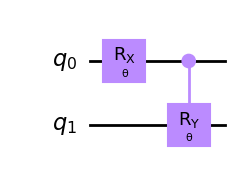

In [55]:
# create a parametrized quantum circuit 
theta  = Parameter('θ')
qc = QuantumCircuit(2)
qc.rx(theta, 0)
qc.cry(theta, 0, 1 )
qc.draw(output = "mpl", style = "clifford")

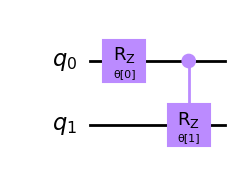

In [56]:
# we can also select a vector of parameters
theta_param = ParameterVector('θ', length=2)
qc = QuantumCircuit(2)
qc.rz(theta_param[0], 0)
qc.crz(theta_param[1], 0, 1)
qc.draw(output = "mpl", style = "clifford")

The quantum circuit as a whole acts as a unitary $U_{\vec{\theta}}$ that, acting on an intial state $\psi_0$, which is usually $\ket{0}^{\otimes n}$, produced the final quantum state
$$
\ket{\psi(\vec{\theta})} = U_{\vec{\theta}}\ket{\psi_0}
$$

The question now is how do we choose a specific quantum circuit? In order to use it for quantum machine learning algorithms the circuit should enalble us to explore the majority of the states of the Hilbert space.
In Reference $1$ a measure of expressibility and entangling capability is proposed. The former is a measure of how large is the subset of states in the Hilbert space that can be generated by the circuit. The latter refers to the ability of the circuit to entangle these states. 
There are many ways to quantify the expressibility of a circuit. However, in Reference $1$ the authors quantify it by computing the distribution of the states generated from the circuit and by seeing how much this distribution deviates from a normal one.
For example, let's consider the $2$ following anstatzes 

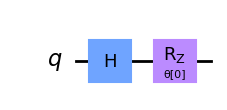

In [57]:
# first ansatze acting on a single qubit
qc1 = QuantumCircuit(1)
theta_param = ParameterVector('θ', length = 2)
qc1.h(0)
qc1.rz(theta_param[0], 0)
qc1.draw(output = "mpl", style = "clifford")


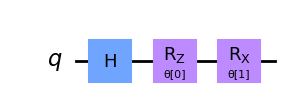

In [58]:
# second ansatze acting on a single qubit
qc2 = QuantumCircuit(1)
qc2.h(0)
qc2.rz(theta_param[0], 0)
qc2.rx(theta_param[1], 0)
qc2.draw(output = "mpl", style = "clifford")

In [59]:
# we can sample 1000 values for eache value of the parameters using a uniform distribution 

np.random.seed(1)                               # fix the seed so that results won't change simulation from simulation
n_param = 1000

theta_param = Parameter('θ')
phi_param = Parameter('Φ')

# Circuit 1
qc1 = QuantumCircuit(1)
qc1.h(0)
qc1.rz(theta_param, 0)

# Circuit 2
qc2 = QuantumCircuit(1)
qc2.h(0)
qc2.rz(theta_param, 0)
qc2.rx(phi_param, 0)

theta = [np.random.uniform() for i in range(n_param)]               # vector theta 
phi = [np.random.uniform() for i in range(n_param)]                 # vector phi 

# we can now build the corresponding bloch states

def states_to_bloch(sv):
    """
    Function that takes as input a state vector and maps it to the bloch sphere, specifying the polar angles theta and phi
    """
    # remember that in general a state vector is specified trough the combination |psi> = cos(θ/2)|0> + e^(i phi)sin(θ/2)
    phi = np.angle(sv.data[1])-np.angle(sv.data[0])
    theta = 2*np.arccos(np.abs(sv.data[0]))
    return np.array([np.sin(theta)*np.cos(theta), np.sin(theta)*np.sin(phi), np.cos(theta)])


/var/folders/hb/_vnjt6s167vgsfsr3dc6zm4w0000gn/T/ipykernel_7090/3381835673.py:12: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0.0 release. Use assign_parameters() instead
  state1 = Statevector.from_instruction(qc1.bind_parameters({theta_param:theta[i]}))                # creates the state vector from circuit 1
/var/folders/hb/_vnjt6s167vgsfsr3dc6zm4w0000gn/T/ipykernel_7090/3381835673.py:13: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0.0 release. Use assign_parameters() instead
  state2 = Statevector.from_instruction(qc2.bind_parameters({theta_param:theta[i], phi_param:phi[i]}))   # creates the state vector from circuit 2


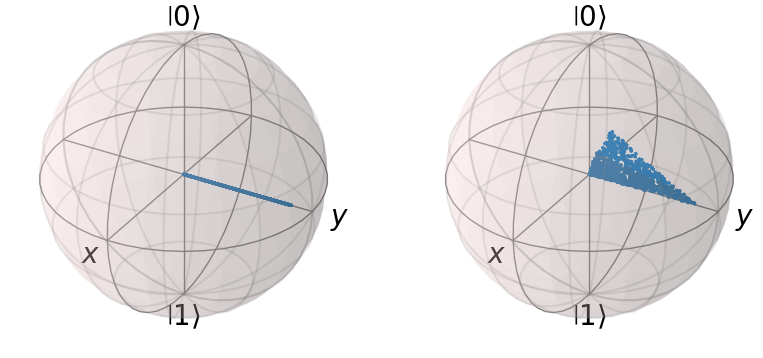

In [60]:
# Bloch sphere plot formatting
width, height = plt.figaspect(1/2)
fig = plt.figure(figsize = (width, height))
ax1, ax2 = fig.add_subplot(1, 2, 1, projection='3d'), fig.add_subplot(1, 2, 2, projection='3d')
b1, b2 = Bloch(axes = ax1), Bloch(axes = ax2)
b1.point_color, b2.point_color = ['tab:blue'],['tab:blue']
b1.point_marker, b2.point_marker= ['o'],['o']
b1.point_size, b2.point_size=[2],[2]

# we ca now calculate the state vectors from the two ansatzes and map the results to the bloch sphere 
for i in range(n_param):
    state1 = Statevector.from_instruction(qc1.bind_parameters({theta_param:theta[i]}))                # creates the state vector from circuit 1 
    state2 = Statevector.from_instruction(qc2.bind_parameters({theta_param:theta[i], phi_param:phi[i]}))   # creates the state vector from circuit 2  

    b1.add_points(states_to_bloch(state1))                  # add points to the first sphere 
    b2.add_points(states_to_bloch(state2))                  # add points to the second sphere

b1.show()
b2.show()

In the following, several parametrized quantum circuit useful for machine learning are shown.

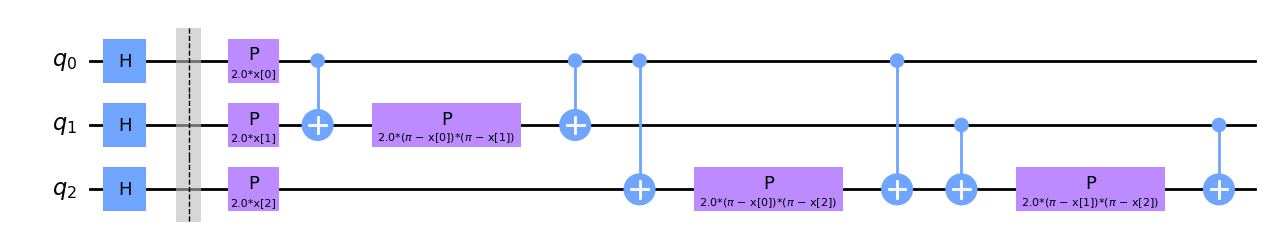

In [61]:
# we have already seen the ZZFeatureMap
from qiskit.circuit.library import ZZFeatureMap
qc_zz = ZZFeatureMap(3, reps = 1, insert_barriers = True)
qc_zz.decompose().draw(output = "mpl", style = "clifford")

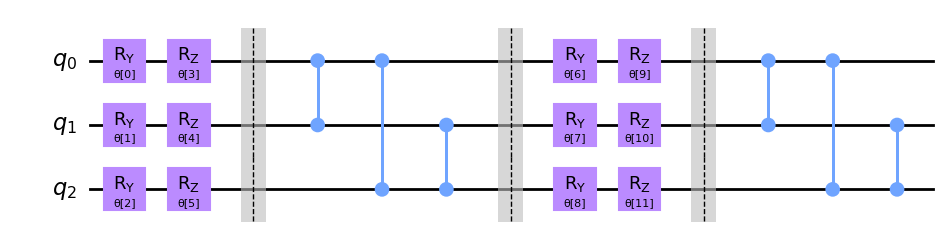

In [62]:
# another possibility could be 
from qiskit.circuit.library import TwoLocal
qc_twolocal = TwoLocal(num_qubits=3, reps=2, rotation_blocks=['ry','rz'], entanglement_blocks='cz', skip_final_rotation_layer=True,
                insert_barriers=True)

qc_twolocal.decompose().draw(output = "mpl", style = "clifford")


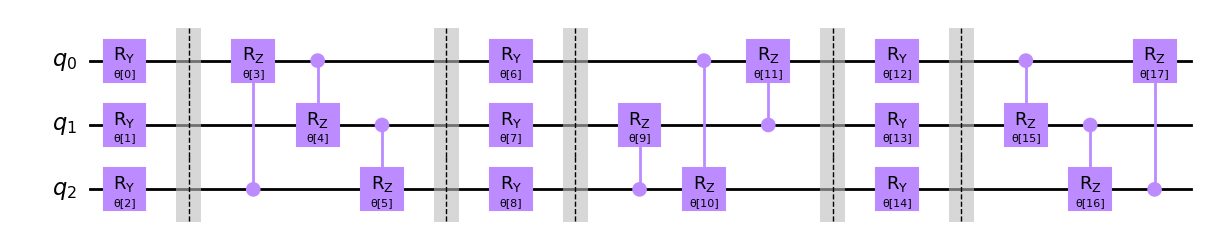

In [63]:
qc_13 = TwoLocal(3, rotation_blocks='ry', entanglement_blocks='crz', entanglement='sca', reps=3, skip_final_rotation_layer=True,
                 insert_barriers=True)
qc_13.decompose().draw(output = "mpl", style = "clifford")

There is also the NLocal circuit, which uses a rotational block on $2$ qubits and an entanglement block on $4$ qubits, using linear entanglement.

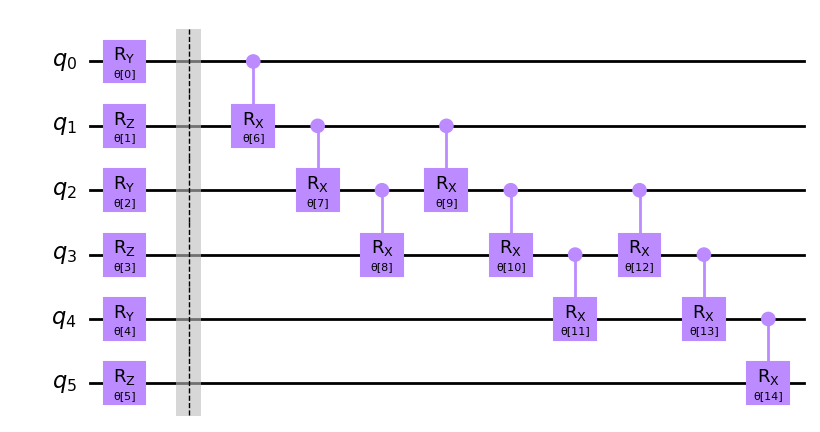

In [64]:
from qiskit.circuit.library import NLocal

# rotation block:
rot_block = QuantumCircuit(2)
params = ParameterVector('r', 2)
rot_block.ry(params[0], 0)
rot_block.rz(params[1], 1)

# entanglement block:
ent_block = QuantumCircuit(4)
params = ParameterVector('e', 3)
ent_block.crx(params[0], 0, 1)
ent_block.crx(params[1], 1, 2)
ent_block.crx(params[2], 2, 3)

qc_nlocal = NLocal(num_qubits=6, rotation_blocks=rot_block, entanglement_blocks=ent_block, entanglement='linear',
                   skip_final_rotation_layer=True, insert_barriers=True)

qc_nlocal.decompose().draw(output = "mpl", style = "clifford")